In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "동래구"
region_code = "7"
target_date = "2016-01-07"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("동래구2016_1q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2016-01-07,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8175,동래구,8180,동래구,5,0.06%,"8,178"
1,2016-01-07,간장,오복왕표 0.9ℓ 1병,6250,동래구,6270,동래구,20,0.32%,"6,260"
2,2016-01-07,고등어,30㎝정도 500g 1마리,4800,동래구,5571,동래구,771,16.06%,"5,186"
3,2016-01-07,달걀,오경슈퍼란60g정도 10개,2700,동래구,2980,동래구,280,10.37%,"2,840"
4,2016-01-07,닭고기,육계 1.0㎏,6471,동래구,6500,동래구,29,0.45%,"6,486"
5,2016-01-07,대파,1.0㎏,3211,동래구,3900,동래구,689,21.46%,"3,556"
6,2016-01-07,돼지고기,삼겹살 500g,11000,동래구,13900,동래구,2900,26.36%,"12,450"
7,2016-01-07,두부,500g 판두부(국산포장두부 420g) 1모,4190,동래구,4200,동래구,10,0.24%,"4,195"
8,2016-01-07,라면,신라면 120g 1봉지,634,동래구,640,동래구,6,0.95%,637
9,2016-01-07,맥주,하이트 500㎖ 1병,1260,동래구,1350,동래구,90,7.14%,"1,305"


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "동래구"
region_code = "7"
target_date = "2016-04-07"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("동래구2016_2q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2016-04-07,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6680,동래구,8175,동래구,1495,22.38%,"7,428"
1,2016-04-07,간장,오복왕표 0.9ℓ 1병,6250,동래구,6280,동래구,30,0.48%,"6,265"
2,2016-04-07,고등어,30㎝정도 500g 1마리,3750,동래구,6700,동래구,2950,78.67%,"5,225"
3,2016-04-07,달걀,오경슈퍼란60g정도 10개,2380,동래구,3000,동래구,620,26.05%,"2,690"
4,2016-04-07,닭고기,육계 1.0㎏,7,동래구,6000,동래구,5993,85614.29%,"3,004"
5,2016-04-07,대파,1.0㎏,3700,동래구,5653,동래구,1953,52.78%,"4,677"
6,2016-04-07,돼지고기,삼겹살 500g,6400,동래구,9600,동래구,3200,50.0%,"8,000"
7,2016-04-07,두부,500g 판두부(국산포장두부 420g) 1모,3900,동래구,4365,동래구,465,11.92%,"4,133"
8,2016-04-07,라면,신라면 120g 1봉지,630,동래구,634,동래구,4,0.63%,632
9,2016-04-07,맥주,하이트 500㎖ 1병,1260,동래구,1350,동래구,90,7.14%,"1,305"


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "동래구"
region_code = "7"
target_date = "2016-07-07"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("동래구2016_3q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2016-07-07,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8160,동래구,8175,동래구,15,0.18%,"8,168"
1,2016-07-07,간장,오복왕표 0.9ℓ 1병,6250,동래구,6260,동래구,10,0.16%,"6,255"
2,2016-07-07,고등어,30㎝정도 500g 1마리,3000,동래구,3200,동래구,200,6.67%,"3,100"
3,2016-07-07,달걀,오경슈퍼란60g정도 10개,2380,동래구,2880,동래구,500,21.01%,"2,630"
4,2016-07-07,닭고기,육계 1.0㎏,6200,동래구,6521,동래구,321,5.18%,"6,361"
5,2016-07-07,대파,1.0㎏,4000,동래구,5000,동래구,1000,25.0%,"4,500"
6,2016-07-07,돼지고기,삼겹살 500g,7900,동래구,11000,동래구,3100,39.24%,"9,450"
7,2016-07-07,두부,500g 판두부(국산포장두부 420g) 1모,3849,동래구,4365,동래구,516,13.41%,"4,107"
8,2016-07-07,라면,신라면 120g 1봉지,634,동래구,640,동래구,6,0.95%,637
9,2016-07-07,맥주,하이트 500㎖ 1병,1260,동래구,1350,동래구,90,7.14%,"1,305"


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "동래구"
region_code = "7"
target_date = "2016-10-06"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("동래구2016_4q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2016-10-06,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7420,동래구,8175,동래구,755,10.18%,"7,798"
1,2016-10-06,간장,오복왕표 0.9ℓ 1병,6250,동래구,6260,동래구,10,0.16%,"6,255"
2,2016-10-06,고등어,30㎝정도 500g 1마리,4000,동래구,4875,동래구,875,21.88%,"4,438"
3,2016-10-06,달걀,오경슈퍼란60g정도 10개,2400,동래구,2900,동래구,500,20.83%,"2,650"
4,2016-10-06,닭고기,육계 1.0㎏,6571,동래구,8000,동래구,1429,21.75%,"7,286"
5,2016-10-06,대파,1.0㎏,2928,동래구,4200,동래구,1272,43.44%,"3,564"
6,2016-10-06,돼지고기,삼겹살 500g,7900,동래구,9900,동래구,2000,25.32%,"8,900"
7,2016-10-06,두부,500g 판두부(국산포장두부 420g) 1모,3849,동래구,4365,동래구,516,13.41%,"4,107"
8,2016-10-06,라면,신라면 120g 1봉지,634,동래구,650,동래구,16,2.52%,642
9,2016-10-06,맥주,하이트 500㎖ 1병,1260,동래구,1350,동래구,90,7.14%,"1,305"


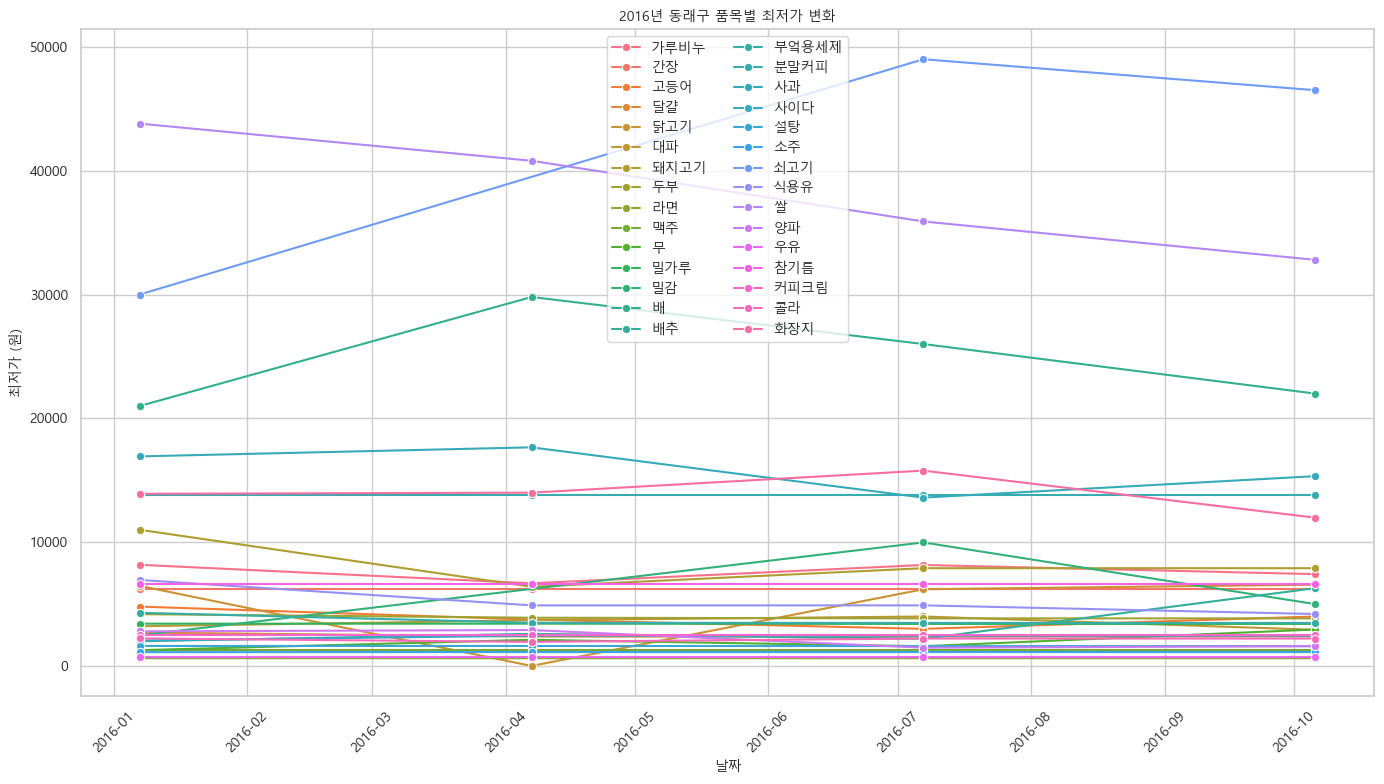

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("동래구2016_1q.csv")
q2 = pd.read_csv("동래구2016_2q.csv")
q3 = pd.read_csv("동래구2016_3q.csv")
q4 = pd.read_csv("동래구2016_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2016년 동래구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("동래구2016_min.csv", index=False, encoding="utf-8-sig")

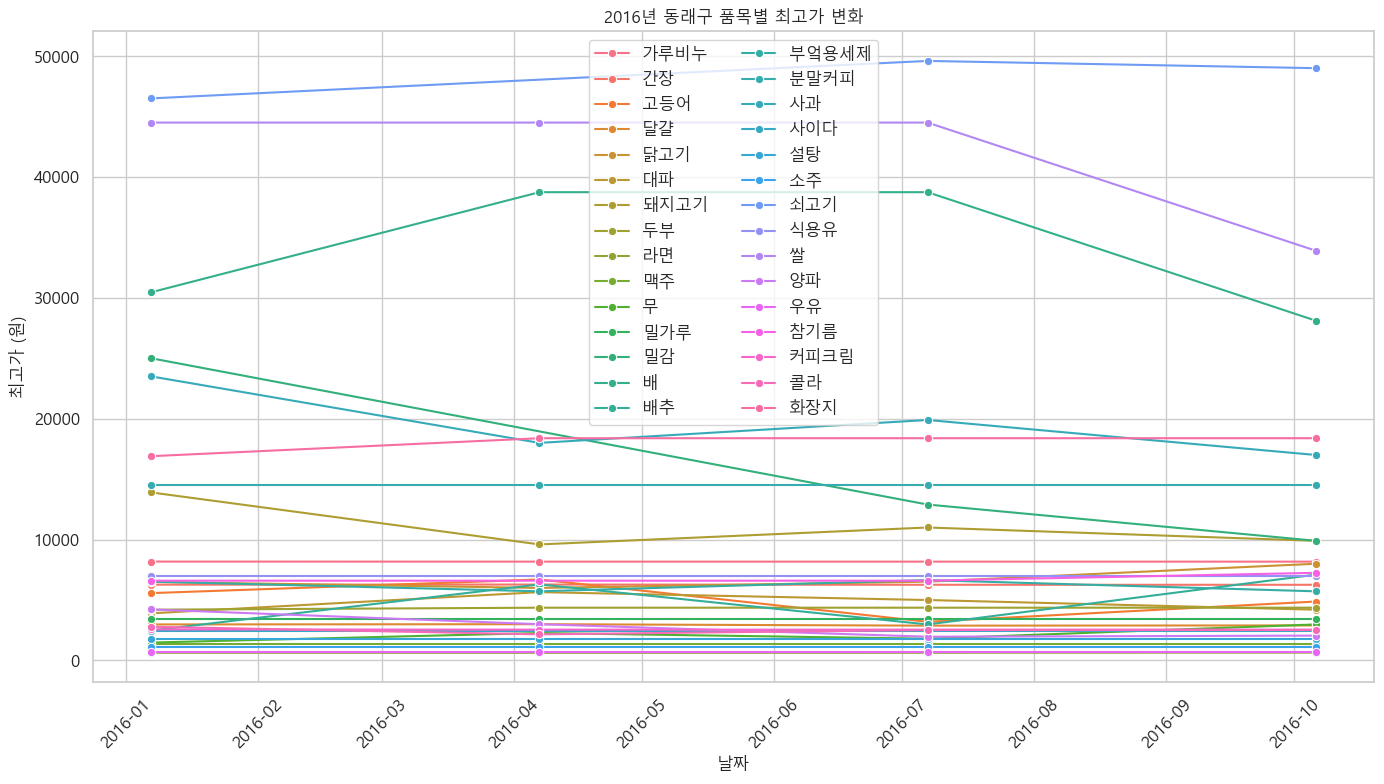

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("동래구2016_1q.csv")
q2 = pd.read_csv("동래구2016_2q.csv")
q3 = pd.read_csv("동래구2016_3q.csv")
q4 = pd.read_csv("동래구2016_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2016년 동래구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("동래구2016_max.csv", index=False, encoding="utf-8-sig")